# [Vision Agents with smolagents](https://huggingface.co/learn/agents-course/unit2/smolagents/vision_agents)

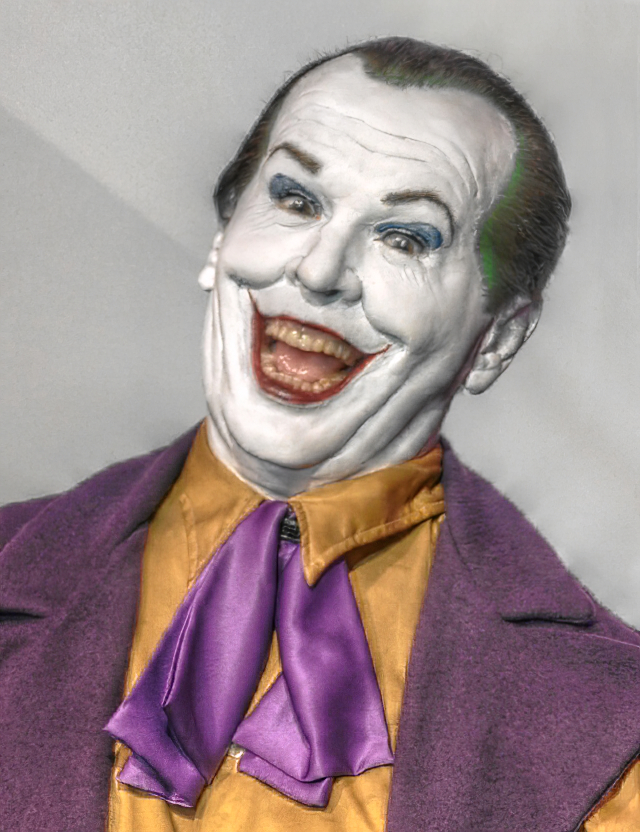

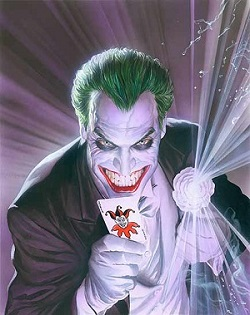

In [4]:
from PIL import Image
import requests
from io import BytesIO

image_urls = [
    "https://upload.wikimedia.org/wikipedia/commons/e/e8/The_Joker_at_Wax_Museum_Plus.jpg", # Joker image
    "https://upload.wikimedia.org/wikipedia/en/9/98/Joker_%28DC_Comics_character%29.jpg" # Joker image
]

images = []
for url in image_urls:
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36" 
    }
    response = requests.get(url,headers=headers)
    image = Image.open(BytesIO(response.content)).convert("RGB")
    images.append(image)

display(images[0])
display(images[1])

In [9]:
from smolagents import CodeAgent, LiteLLMModel

model = LiteLLMModel(
    model_id="ollama_chat/deepseek-r1:7b",
    api_base="http://127.0.0.1:11434",
    num_ctx=8192,
)

agent = CodeAgent(
    model=model,
    tools=[],
    max_steps=3,
    verbosity_level=2,
    #flatten_messages_as_text=False
)

response = agent.run(
    """
    Describe the costume and makeup that the comic character in these photos is wearing and return the description.
    Tell me if the guest is The Joker or Wonder Woman.
    """,
    images=images,
)

print(response)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Describe the costume and makeup that the comic character in these photos is wearing and return the description. │
│     Tell me if the guest is The Joker or Wonder Woman.                                                          │
│                                                                                                                 │
╰─ LiteLLMModel - ollama_chat/deepseek-r1:7b ─────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Error in generating model output:
Cannot use images with flatten_messages_as_text=True

[Step 1: Duration 0.01 seconds]

AgentGenerationError: Error in generating model output:
Cannot use images with flatten_messages_as_text=True